In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# read data
reviews_df_main = pd.read_excel("RC.xlsx")
reviews_df = pd.DataFrame()
reviews_df['review'] = reviews_df_main["Review"]
reviews_df['OTA'] = reviews_df_main['OTA']
reviews_df['Service'] = reviews_df_main['Service ']

reviews_df.head()

,review,OTA,Service
0,"Hello all, I am writing a review on Makemytrip...",MMT,Customer Service
1,"Hello Friends,\nI have booked a room in Raddis...",MMT,Hotel Booking
2,I was trying to book an intl flight for 4 pass...,MMT,Flight Booking
3,Unbeatable match with other trip booking apps ...,MMT,Trip Booking
4,They cannot be reliable in matter of hotel boo...,MMT,hotel bookings


In [35]:
#Cleaning the data 
reviews_df["review"] = [x.replace("\n", " ") for x in reviews_df["review"] ]
reviews_df['Service'] = reviews_df['Service'].str.lower()


#reviews_df["Service"].str.contains("bus")

reviews_df['Service'].replace(' ', np.nan, inplace=True)
reviews_df['Service'].replace('-', np.nan, inplace=True)
reviews_df.dropna(inplace= True)
#len(reviews_df.groupby(["Service"]).groups.keys())
abc = reviews_df.groupby(["Service"]).groups.keys()
for i in abc:
  print(i)

 flight booking
airlines booking
app and website services
app services
awesome services
booking
booking facilities
booking,customer support
buffet dinner
bus
bus booking
bus service
bus ticket
bus tickiet
cab
cab booking
cab service
cars
customer care
customer care service
customer service
customer supoprt
customer support
flight
flight 
flight bookimgt
flight booking
flight rickets
flight ticket
flight ticket, hotel rooms
flight tickets
flight tickets, hotel room
flight tickets, hotel room, train and bus ticket
flight tickets, resort
flight tickets,holiday packages
flight tickets.
flight, hotel
flight, hotel and holiday packages
flight, hotel rooms
flight, hotel, cab
flight, hotel, train.
flight, hotel.
flight, hotels and holiday packages
flight,cab,hotel
flight,cab,train,hotel
flight,hotel
flight,hotels
flight,train,bus,hotel
flight/hotel booking
flights
flights, hotels
flights,hotel booking
flights,hotel reservation
holiday booking
holiday package
holiday package includes flight tic

In [0]:
#breaking point
flight_df = pd.DataFrame()
#df[(df['col_name'].str.contains('apple')) & (df['col_name'].str.contains('banana'))]
#reviews_df = reviews_df[reviews_df["OTA"]=="ClearTrip"]

#bus , flight, 
name_service = "hotel"
flight_df = reviews_df[reviews_df["Service"].str.contains(name_service)]
flight_df.groupby(["Service"]).groups.keys()
reviews_df = flight_df

In [37]:
# return the wordnet object value corresponding to the POS tag
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
      
def get_noun(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review"] = reviews_df["review"].apply(lambda x : str(x))
reviews_df["review_clean"] = reviews_df['review'].apply(lambda x: clean_text(x))

reviews_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,OTA,Service,review_clean
1,"Hello Friends, I have booked a room in Raddiso...",MMT,hotel booking,hello friend book room raddison atrium banglor...
4,They cannot be reliable in matter of hotel boo...,MMT,hotel bookings,cannot reliable matter hotel booking happen ha...
11,Holiday package booked with single payment and...,MMT,hotel bookings,holiday package book single payment receive se...
13,"Please if you can, stay away from booking on M...",MMT,hotel bookings,please stay away book makemytrip honest review...
26,Booked a Thailand tour for 8 nights at 60k per...,MMT,hotel,book thailand tour night per head hotel mentio...


In [38]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
reviews_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,OTA,Service,review_clean,neg,neu,pos,compound
1,"Hello Friends, I have booked a room in Raddiso...",MMT,hotel booking,hello friend book room raddison atrium banglor...,0.097,0.860,0.043,-0.4435
4,They cannot be reliable in matter of hotel boo...,MMT,hotel bookings,cannot reliable matter hotel booking happen ha...,0.000,0.954,0.046,0.4310
11,Holiday package booked with single payment and...,MMT,hotel bookings,holiday package book single payment receive se...,0.092,0.840,0.069,-0.6147
13,"Please if you can, stay away from booking on M...",MMT,hotel bookings,please stay away book makemytrip honest review...,0.036,0.925,0.040,-0.3590
26,Booked a Thailand tour for 8 nights at 60k per...,MMT,hotel,book thailand tour night per head hotel mentio...,0.000,0.961,0.039,0.5106


In [0]:
#reviews_df.to_excel("output.xlsx") 

In [40]:
total_positive = len(reviews_df[reviews_df["compound"] >= 0 ])
total_negative = len(reviews_df[reviews_df["compound"] < 0 ])
print("negative reviews:", total_negative )
print("positive reviews:", total_positive )
total = total_negative + total_positive
print("total: ", total )

negative reviews: 200
positive reviews: 259
total:  459


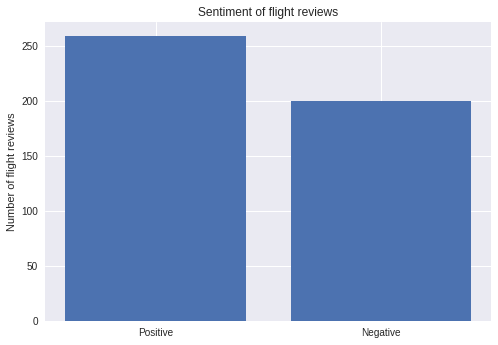

In [41]:
sentiment=['Positive','Negative']
revenue=[total_positive, total_negative]
xpos = np.arange(len(sentiment))
plt.bar(xpos,revenue, label="Reviews")

plt.xticks(xpos,sentiment)
plt.ylabel("Number of "+word+" reviews")
plt.title("Sentiment of "+word+" reviews")
plt.savefig(word+"_total")


In [42]:
pos = reviews_df[reviews_df["compound"]  >= 0 ].groupby('OTA')["OTA"].apply(list)
neg = reviews_df[reviews_df["compound"]  < 0 ].groupby('OTA')["OTA"].apply(list)


OTA = []
posi = []
negi = []
for i in range(len(pos)):
  OTA.append(pos[i][0])
  posi.append(len(pos[i]))
  negi.append(len(neg[i]))
  print(OTA[i]," : Positive:  ", posi[i], " Negative: ", negi[i])

ClearTrip  : Positive:   27  Negative:  60
Goibibo  : Positive:   128  Negative:  76
MMT  : Positive:   90  Negative:  57
Yatra  : Positive:   14  Negative:  7


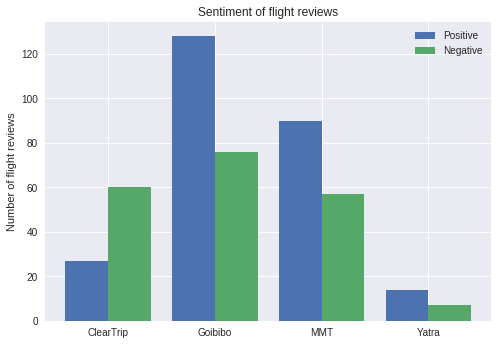

In [43]:
xpos = np.arange(len(OTA))
plt.bar(xpos-0.2,posi, width=0.4, label="Positive")
plt.bar(xpos+0.2,negi, width=0.4,label="Negative")

plt.xticks(xpos,OTA)
plt.ylabel("Number of "+word+" reviews")
plt.title("Sentiment of "+word+" reviews")
plt.legend()
plt.savefig(word+"_OTA")

In [44]:
!pip install xlsxwriter
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('temp.xlsx') 
worksheet = workbook.add_worksheet() 

for i in range(len(pos)):
  worksheet.write(i, 0 , OTA[i])
  worksheet.write(i, 1 , posi[i])
  worksheet.write(i, 2 , negi[i])

worksheet.write(i+1, 0 , "Total")
worksheet.write(i+1, 1 , total_positive)
worksheet.write(i+1, 2 , total_negative)


  #print(OTA[i]," : Positive:  ", posi[i], " Negative: ", negi[i])

workbook.close()